In [ ]:
!pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.1/38.6 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.2/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.2/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.6 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.5/38.6 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.6/38.6 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.8/38.6 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.6 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.6 MB 2.4 MB/s eta 0:00:16
   - -------------

In [ ]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
image_dir = "./images/"

In [ ]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [ ]:
samples = 20000
df=df.loc[df["id"].str.startswith('00', na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [ ]:
num_classes

13589

In [ ]:
num_data

16157

In [ ]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12


In [ ]:
data.tail()

,landmark_id,count
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1
13588,63972,1


In [ ]:
data.columns=['landmark_id','count']

In [ ]:
data['count'].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: count, dtype: float64

(array([1.3582e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

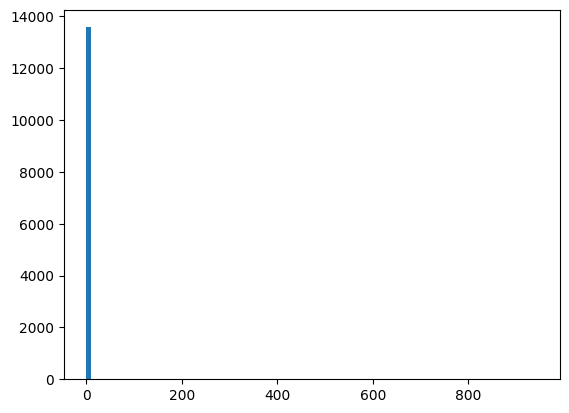

In [ ]:
plt.hist(data['count'], 100, range=(0, 944), label='test')

In [ ]:
data['count'].between(0,5).sum()

13549

In [ ]:
data['count'].between(5,10).sum()

69

(array([1., 2., 1., ..., 1., 1., 5.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

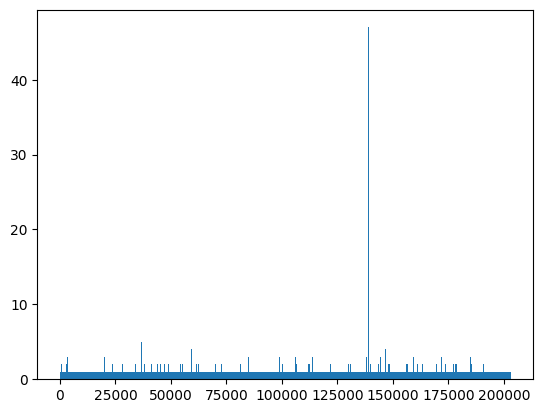

In [ ]:
plt.hist(df["landmark_id"], bins=sorted(df["landmark_id"].unique()))

In [ ]:
unique_landmark_ids = np.sort(df["landmark_id"].unique())

(array([1., 2., 1., ..., 1., 1., 5.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

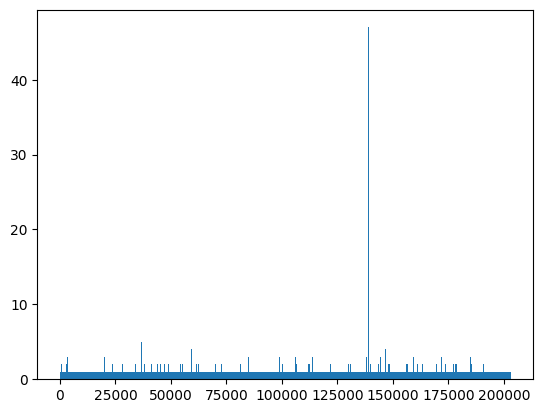

In [ ]:
plt.hist(df["landmark_id"], bins=unique_landmark_ids)

In [ ]:
!pip install scikit-learn

In [ ]:
#training of model
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [ ]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937


In [ ]:
def encode_lable(lbl):
  return lencoder.transform(lbl)

In [ ]:
def encode_lable(lbl):
  return lencoder.inverse_transformtransform(lbl)

In [ ]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1, f2, f3, fname)
    im = cv2.imread(os.path.join(base_path, path))
    return im, label

In [ ]:
print(image_dir)

./images/


4 sample images from random classes


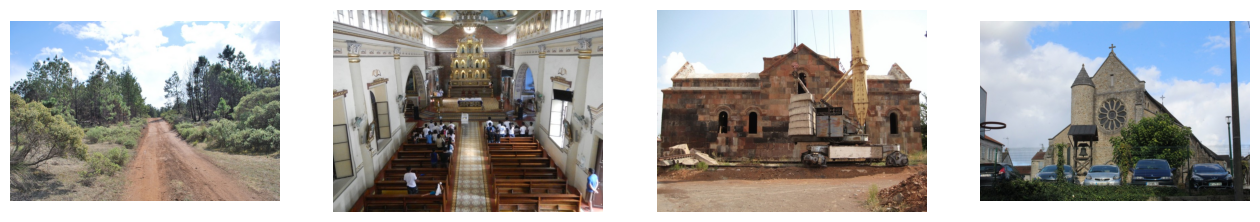

In [ ]:
print("4 sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
  ri = random.choices(os.listdir(image_dir), k=3)
  folder = image_dir + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
  random_img = random.choice(os.listdir(folder))
  img = np.array(Image.open(folder+'/'+random_img))
  fig.add_subplot(1,4,i)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [ ]:
#parameters
learning_rate = 0.0001
decay_speed = 1e-6
momentum    = 0.09
loss_function ="sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [ ]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = "softmax" ))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_4                │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 195,244,385 (744.80 MB)

 Trainable params: 195,244,379 (744.80 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optim1 = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1,
              loss=loss_function,
              metrics=["accuracy"])


In [ ]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [ ]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start + batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0  # Corrected function name
        image_array.append(im)
        label_array.append(label)  # Corrected variable name
    label_array = encode_label(label_array)  # Corrected function name

    return np.array(image_array), np.array(label_array)


In [ ]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

#split
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

12925
3232


In [ ]:
for e in range(epochs):
    print("Epoch: " + str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac=1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train)
model.save("model")


Epoch: 1/1


ValueError: too many values to unpack (expected 2)

In [ ]:
#test
batch_size = 16

errors = 0
good_preds = []
bad_pred = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(train, it*batch_size, batch_size)

    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    for idx,res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx], cla[idx], res[cla[idx]])
        else:
             good_preds.append([batch_size*it + idx], cla[idx], res[cla[idx]])
for i in range(1,6):
    n = int(good_preds[0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

ValueError: too many values to unpack (expected 2)